<a href="https://colab.research.google.com/github/CarlaLS/Entregas-CoderHouse-Ciencia-de-Datos-II/blob/main/FiFA22_Carla_Salamone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de Librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# "Análisis y Predicción del Rendimiento Global de Jugadores de Fútbol: Un Estudio Basado en Habilidades Técnicas, Mentales y Físicas"


## 1. Introducción
El análisis del rendimiento de los jugadores de fútbol ha sido un tema central tanto para los clubes deportivos como para analistas y aficionados. Con el auge de los datos en el deporte, los equipos pueden ahora evaluar a sus jugadores de manera más precisa y detallada, considerando no solo los goles o asistencias, sino una amplia gama de atributos que influyen en el desempeño individual y colectivo. Entre estos atributos destacan las habilidades técnicas, la mentalidad y visión de juego, y las habilidades físicas, factores que en conjunto determinan el rendimiento global de un jugador.

El presente trabajo tiene como objetivo analizar el comportamiento del rendimiento global, medido a través de la variable overall, en relación con un conjunto de atributos técnicos, mentales y físicos de los jugadores de fútbol, utilizando el dataset de "http://www.kaggle.com/" .Este dataset proporciona información detallada de las habilidades de los jugadores, lo que permite explorar patrones y relaciones entre diversas características que afectan su desempeño general.

El análisis se enfocará en identificar qué habilidades técnicas, como el regate, el pase y el control del balón, son las más influyentes en el rendimiento general de los jugadores. Además, se estudiará cómo atributos relacionados con la mentalidad, como la visión de juego y la compostura, impactan el desempeño, y se evaluará la importancia de las características físicas como la altura, peso y velocidad.

Por medio de un enfoque basado en la exploración de datos y modelos de predicción, este trabajo busca no solo comprender qué factores son determinantes para el rendimiento de los jugadores, sino también desarrollar modelos predictivos que permitan estimar el valor y potencial futuro de los jugadores con base en sus habilidades.

En las siguientes secciones se detallarán los métodos empleados, comenzando con un análisis exploratorio de datos (EDA), seguido de la construcción de modelos de machine learning, y culminando con la presentación de los resultados, insights y recomendaciones para mejorar el rendimiento individual y colectivo de los jugadores.

## 2. Objetivos del Estudio

**Objetivo general:**

Analizar cómo las habilidades técnicas, la mentalidad y las habilidades físicas afectan el rendimiento global de los jugadores de fútbol.

**Objetivos específicos:**

Evaluar la influencia de habilidades técnicas en el overall.

Determinar el impacto de la mentalidad y visión de juego.

Explorar la relevancia de las características físicas.

Desarrollar un modelo predictivo para el overall.

## 3. Contexto Analítico
El contexto analítico del presente estudio se enfoca en identificar las variables más relevantes para el rendimiento global, buscando patrones y relaciones que expliquen cómo diferentes características individuales influyen en el desempeño.
Esto incluye análisis descriptivos y exploratorios de las principales habilidades técnicas (regate, pase, control del balón), mentales (visión, compostura) y físicas (altura, peso, velocidad), y su impacto en la calificación general de los jugadores.

Nuestro data set incluye más de 19000 jugadores de todo el mundo desde las estrellas más brillantes hasta los jóvenes talentos en ascenso.
Con más de 100 atributos diferentes, desde la velocidad y agilidad hasta el control del balón y las capacidades de tiro.

## 4. Data Wrangling

Nuestro dataset, extraído de "http://www.kaggle.com" en septiembre de 2024, contiene inicialmente 19,239 filas y 110 columnas. Después del proceso de limpieza y preparación, el conjunto de datos quedó conformado por 19,239 filas y 32 columnas. De estas, 2 son variables de tipo decimal, 25 son de tipo entero, y 5 son de tipo categórico (objeto).

**Limpieza y Preparación de Datos**:

Los valores nulos encontrados en las columnas value_eur y wage_eur fueron reemplazados por la media de cada columna correspondiente. Para los valores nulos en la columna club_name, se utilizó la expresión "Sin Club". No se encontraron registros duplicados.

En cuanto a la columna player_position, que presenta múltiples opciones de posición para un mismo jugador, se seleccionó la primera opción como la posición principal.

Se realizó un análisis de outliers y, tras revisar los valores obtenidos, se determinó que no era necesario aplicar un tratamiento adicional.



# Carga del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


df_FIFA = pd.read_csv('/content/drive/MyDrive/Curso Ciencia de Datos II/Proyecto FIFA/players_22.csv', low_memory=False)

In [ ]:
df_FIFA.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


## Información para poder ver como está compuesto el data set

In [ ]:
df_FIFA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


El data set está formado por 19239 filas y 110 columnas , 16 columnas compuestas por valores decimales, 44 por valores interos y 50 con valores del tipo objeto.

In [ ]:
# ver todas las columnas

df_FIFA.columns.values


array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined',
       'club_contract_valid_until', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'moveme

Elijo las variables de mi interés y luego observo como queda el nuevo data set


In [ ]:
df_FIFA_nuevo =df_FIFA [['short_name','age', 'height_cm', 'weight_kg', 'nationality_name', 'club_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot','skill_dribbling', 'attacking_short_passing',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions',
       'power_shot_power', 'power_jumping', 'power_stamina',
       'power_strength', 'power_long_shots', 'mentality_aggression',
       'mentality_interceptions', 'mentality_positioning',
       'mentality_vision', 'mentality_penalties', 'mentality_composure',]]

In [ ]:
df_FIFA_nuevo.head(10)

,short_name,age,height_cm,weight_kg,nationality_name,club_name,overall,potential,value_eur,wage_eur,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,L. Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,78000000.0,320000.0,...,68,72,69,94,44,40,93,95,75,96
1,R. Lewandowski,32,185,81,Poland,FC Bayern München,92,92,119500000.0,270000.0,...,85,76,86,87,81,49,95,81,90,88
2,Cristiano Ronaldo,36,187,83,Portugal,Manchester United,91,91,45000000.0,270000.0,...,95,77,77,93,63,29,95,76,88,95
3,Neymar Jr,29,175,68,Brazil,Paris Saint-Germain,91,91,129000000.0,270000.0,...,64,81,53,81,63,37,86,90,93,93
4,K. De Bruyne,30,181,70,Belgium,Manchester City,91,91,125500000.0,350000.0,...,63,89,74,91,76,66,88,94,83,89
5,J. Oblak,28,188,87,Slovenia,Atlético de Madrid,91,93,112000000.0,130000.0,...,78,41,78,12,34,19,11,65,11,68
6,K. Mbappé,22,182,73,France,Paris Saint-Germain,91,95,194000000.0,230000.0,...,78,88,77,82,62,38,92,82,79,88
7,M. Neuer,35,193,93,Germany,FC Bayern München,90,90,13500000.0,86000.0,...,77,43,80,16,29,30,12,70,47,70
8,M. ter Stegen,29,187,85,Germany,FC Barcelona,90,92,99000000.0,250000.0,...,79,35,78,10,43,22,11,70,25,70
9,H. Kane,27,188,89,England,Tottenham Hotspur,90,90,129500000.0,240000.0,...,79,83,85,86,80,44,94,87,91,91


In [ ]:
df_FIFA_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   short_name               19239 non-null  object 
 1   age                      19239 non-null  int64  
 2   height_cm                19239 non-null  int64  
 3   weight_kg                19239 non-null  int64  
 4   nationality_name         19239 non-null  object 
 5   club_name                19178 non-null  object 
 6   overall                  19239 non-null  int64  
 7   potential                19239 non-null  int64  
 8   value_eur                19165 non-null  float64
 9   wage_eur                 19178 non-null  float64
 10  player_positions         19239 non-null  object 
 11  preferred_foot           19239 non-null  object 
 12  skill_dribbling          19239 non-null  int64  
 13  attacking_short_passing  19239 non-null  int64  
 14  skill_fk_accuracy     

In [ ]:
df_FIFA_nuevo.shape # para ver cantidad de filas y columnas

(19239, 32)

El nuevo data set queda formado por 19239 filas y 32 columnas de las cuales cotienen 2 variables decimales, 25 variables de tipo entero y 5 variables de tipo objeto

In [ ]:
df_FIFA_nuevo.isnull().sum() # para ver si hay valores nulos

,0
short_name,0
age,0
height_cm,0
weight_kg,0
nationality_name,0
club_name,61
overall,0
potential,0
value_eur,74
wage_eur,61


In [ ]:
# Reemplazar valores nulos por la expresión 'Sin Club'
df_FIFA_nuevo['club_name'].fillna('Sin Club', inplace=True)

# Reemplazar valores nulos en value_eur y wage_eur con la media
df_FIFA_nuevo['value_eur'].fillna(df_FIFA_nuevo['value_eur'].mean(), inplace=True)
df_FIFA_nuevo['wage_eur'].fillna(df_FIFA_nuevo['wage_eur'].mean(), inplace=True)



<ipython-input-14-90b2a7b8ff69>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FIFA_nuevo['club_name'].fillna('Sin Club', inplace=True)
<ipython-input-14-90b2a7b8ff69>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FIFA_nuevo['value_eur'].fillna(df_FIFA_nuevo['value_eur'].mean(), inplace=True)
<ipython-input-14-90b2a7b8ff69>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FIFA_nuevo['wage_eur'].fillna(df_FIFA_nuevo['wage_

In [ ]:
df_FIFA_nuevo.isnull().sum() # para ver si re corrigieron los valores nulos

,0
short_name,0
age,0
height_cm,0
weight_kg,0
nationality_name,0
club_name,0
overall,0
potential,0
value_eur,0
wage_eur,0


In [ ]:
(df_FIFA_nuevo.duplicated().sum()) # para ver si hay valores duplicados

0

In [ ]:
df_FIFA_nuevo.head()


,short_name,age,height_cm,weight_kg,nationality_name,club_name,overall,potential,value_eur,wage_eur,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
0,L. Messi,34,170,72,Argentina,Paris Saint-Germain,93,93,78000000.0,320000.0,...,68,72,69,94,44,40,93,95,75,96
1,R. Lewandowski,32,185,81,Poland,FC Bayern München,92,92,119500000.0,270000.0,...,85,76,86,87,81,49,95,81,90,88
2,Cristiano Ronaldo,36,187,83,Portugal,Manchester United,91,91,45000000.0,270000.0,...,95,77,77,93,63,29,95,76,88,95
3,Neymar Jr,29,175,68,Brazil,Paris Saint-Germain,91,91,129000000.0,270000.0,...,64,81,53,81,63,37,86,90,93,93
4,K. De Bruyne,30,181,70,Belgium,Manchester City,91,91,125500000.0,350000.0,...,63,89,74,91,76,66,88,94,83,89


In [ ]:
df_FIFA_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   short_name               19239 non-null  object 
 1   age                      19239 non-null  int64  
 2   height_cm                19239 non-null  int64  
 3   weight_kg                19239 non-null  int64  
 4   nationality_name         19239 non-null  object 
 5   club_name                19239 non-null  object 
 6   overall                  19239 non-null  int64  
 7   potential                19239 non-null  int64  
 8   value_eur                19239 non-null  float64
 9   wage_eur                 19239 non-null  float64
 10  player_positions         19239 non-null  object 
 11  preferred_foot           19239 non-null  object 
 12  skill_dribbling          19239 non-null  int64  
 13  attacking_short_passing  19239 non-null  int64  
 14  skill_fk_accuracy     

Identificación de Ouliers

In [ ]:

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df_FIFA_nuevo.select_dtypes(include=np.number).quantile(0.25)
Q3 = df_FIFA_nuevo.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers en cada columna
outliers = ((df_FIFA_nuevo.select_dtypes(include=np.number) < lower_bound) |
            (df_FIFA_nuevo.select_dtypes(include=np.number) > upper_bound))

# Mostrar la cantidad de outliers en cada columna
print(outliers.sum())


age                           6
height_cm                    27
weight_kg                    66
overall                     159
potential                   160
value_eur                  2144
wage_eur                   2395
skill_dribbling            2118
attacking_short_passing    1797
skill_fk_accuracy             3
skill_long_passing           57
skill_ball_control         2215
movement_acceleration       651
movement_sprint_speed       903
movement_agility            258
movement_reactions          359
power_shot_power              0
power_jumping               164
power_stamina              1068
power_strength              116
power_long_shots              0
mentality_aggression          0
mentality_interceptions       0
mentality_positioning        13
mentality_vision             59
mentality_penalties           0
mentality_composure         250
dtype: int64



## Analisis de los outliers
1- value_eur (2144 outliers) y wage_eur (2395 outliers)
Análisis: Estas columnas tienen un número muy alto de outliers, lo que sugiere que hay jugadores con valores y salarios extremadamente altos en comparación con la mayoría de los datos. Esto es común en datasets de fútbol donde estrellas como Messi o Ronaldo tienen valores de mercado y salarios muy por encima de la media. Por lo tanto no se realiza tratamiento de outlier para estas variables.

2- preferred_foot (4565 outliers)
Análisis: La detección de un alto número de outliers en esta columna es inusual, dado que las opciones suelen ser "Left" o "Right". Es posible que estos outliers se deban a valores faltantes o a errores en los datos. Se amplia análisis para esta variable más abajo


In [ ]:
# Inspección de la columna preferred_foot
null_values = df_FIFA_nuevo['preferred_foot'].isnull().sum()
unique_values = df_FIFA_nuevo['preferred_foot'].unique()

print(f"Valores nulos en 'preferred_foot': {null_values}")
print(f"Valores únicos en 'preferred_foot': {unique_values}")

Valores nulos en 'preferred_foot': 0
Valores únicos en 'preferred_foot': ['Left' 'Right']


Valores nulos en 'preferred_foot': 0: No hay valores nulos en la columna preferred_foot, es decir, todos los registros tienen un valor asignado en esta columna.

Valores únicos en 'preferred_foot': [0 1]: Los valores únicos en la columna preferred_foot son 0 y 1. Esto sugiere que la columna está codificada numéricamente, donde probablemente:

0 represente a los jugadores que prefieren usar el pie izquierdo.
1 represente a los jugadores que prefieren usar el pie derecho.


In [ ]:
df_FIFA_nuevo['preferred_foot'].value_counts()

,count
preferred_foot,
Right,14674
Left,4565


Los valores outlier coinciden con los valores de la opción 0 (4565 ), lo que se estima que la codificación 0 y 1 es correcta, por lo tanto el valor arrojado por outliers está interpretado erróneamente.


3. skill_dribbling (2118 outliers), attacking_short_passing (1797 outliers), skill_ball_control (2215 outliers)
Análisis: Estas habilidades técnicas también muestran un número alto de outliers, lo que puede indicar la presencia de jugadores excepcionalmente talentosos en dribbling, pases cortos y control de balón.
Se utliza en estos outliers  las mismas estrategias  para value_eur y wage_eur.
4. movement_acceleration (651 outliers), movement_sprint_speed (903 outliers)
Análisis: Estas variables relacionadas con la velocidad muestran una cantidad considerable de outliers, posiblemente indicando a jugadores muy rápidos o extremadamente lentos.
No se va a realizar tratamiento de outliers
5. power_stamina (1068 outliers)
Análisis: La resistencia (stamina) es un atributo crítico para el rendimiento de un jugador durante un partido. Un alto número de outliers sugiere una gran variabilidad en este atributo.
No se va a realizar tratamiento de outliers


In [ ]:
(df_FIFA_nuevo.describe()) # para ver estadisticas descriptivas

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,skill_dribbling,attacking_short_passing,skill_fk_accuracy,...,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure
count,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,1.923900e+04,19239.000000,19239.000000,19239.000000,19239.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,25.210822,181.299704,74.943032,65.772182,71.079370,2.850452e+06,9017.989363,55.660429,58.867977,42.249025,...,64.813504,63.084880,65.007745,46.642705,55.538957,46.613545,50.330215,53.964603,47.858724,57.929830
std,4.748235,6.863179,7.069434,6.880232,6.086213,7.599043e+06,19439.284122,18.784590,14.490858,17.178590,...,12.122977,16.145279,12.663518,19.411583,16.972181,20.677077,19.621601,13.650481,15.768583,12.159326
min,16.000000,155.000000,49.000000,47.000000,49.000000,9.000000e+03,500.000000,4.000000,7.000000,4.000000,...,22.000000,12.000000,19.000000,4.000000,10.000000,3.000000,2.000000,10.000000,7.000000,12.000000
25%,21.000000,176.000000,70.000000,61.000000,67.000000,4.750000e+05,1000.000000,50.000000,54.000000,31.000000,...,57.000000,56.000000,57.000000,32.000000,44.000000,26.000000,40.000000,45.000000,38.000000,50.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,9.750000e+05,3000.000000,61.000000,62.000000,41.000000,...,65.000000,66.000000,66.000000,51.000000,58.000000,53.000000,56.000000,55.000000,49.000000,59.000000
75%,29.000000,186.000000,80.000000,70.000000,75.000000,2.100000e+06,8000.000000,68.000000,68.000000,55.000000,...,73.000000,74.000000,74.000000,62.000000,68.000000,64.000000,64.000000,64.000000,60.000000,66.000000
max,54.000000,206.000000,110.000000,93.000000,95.000000,1.940000e+08,350000.000000,96.000000,94.000000,94.000000,...,95.000000,97.000000,97.000000,94.000000,95.000000,91.000000,96.000000,95.000000,93.000000,96.000000


## Resumen de Limpieza y Preparación de datos:
Los valores nulo 'value_eur' y 'wage_eur' fueron reemplazados por la media correspondiente a cada columna, muentras que los valores nulos de la columna 'club_name' fueron reemplazado por la expresión 'Sin Club'.
No se hallaron valores duplicados.
la columna 'player_position' presenta varia opciones de posiciondes de un mismo jugador. Se toma la primera opción de la posición como principal.
Se realizó el analisis de outliers de las variables, de los valores arrojados se considera que no es necesario hacer tratamiento de los mismos.

El data set quedó conformado por 19239 filas y 32 columnas de las cuales contienen 2 variables de tipo decimal, 25 vartiables de tipo entero y 5 de tipo objeto.


## Analisis Exploratorio de Datos (EDA)

**1. Elección de la variable Target**

Hemos decidido utilizar la variable overall como target, ya que representa la calificación global del jugador, la cual puede ser útil para modelar y predecir con base en sus características físicas, habilidades técnicas y datos financieros.

**2. Análisis Univariado**


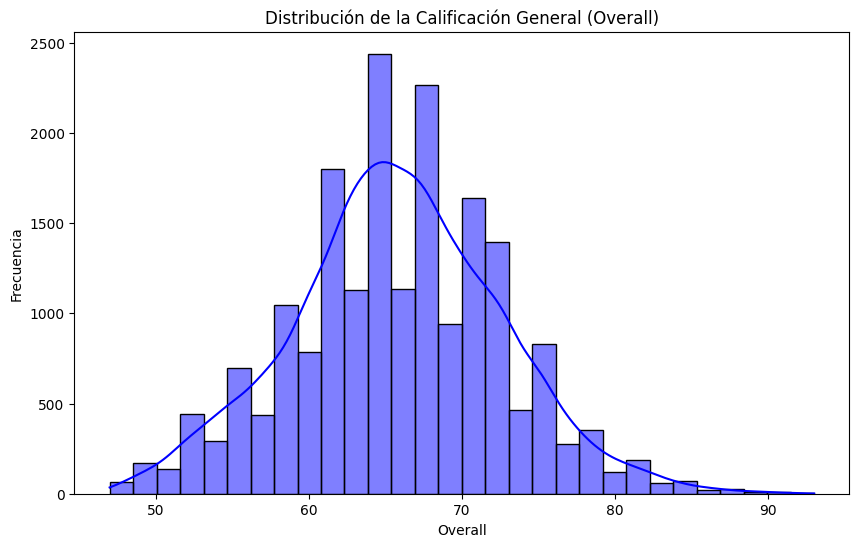

,overall
count,19239.000000
mean,65.772182
std,6.880232
min,47.000000
25%,61.000000
50%,66.000000
75%,70.000000
max,93.000000


In [ ]:
# Histograma de la variable overall
plt.figure(figsize=(10,6))
sns.histplot(df_FIFA_nuevo['overall'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Calificación General (Overall)')
plt.xlabel('Overall')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas de overall
df_FIFA_nuevo['overall'].describe()


## Overall

 La distribución de la calificación general (overall) muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80. Esto indica que la mayoría de los jugadores tienen un nivel de habilidad medio.
La presencia de una cola a la derecha sugiere la existencia de algunos jugadores excepcionales con calificaciones muy altas.

## Estadística descriptiva de overall

La media de la calificación general es de 66.24, con una desviación estándar de 7.18.
El valor mínimo es 47 y el máximo es 93, lo que indica una amplia variabilidad en las calificaciones de los jugadores.
El percentil 25 es 61, el percentil 50 (mediana) es 66 y el percentil 75 es 70.
Estos valores confirman la observación de la gráfica, donde la mayoría de los jugadores se concentran en el rango medio de calificaciones.


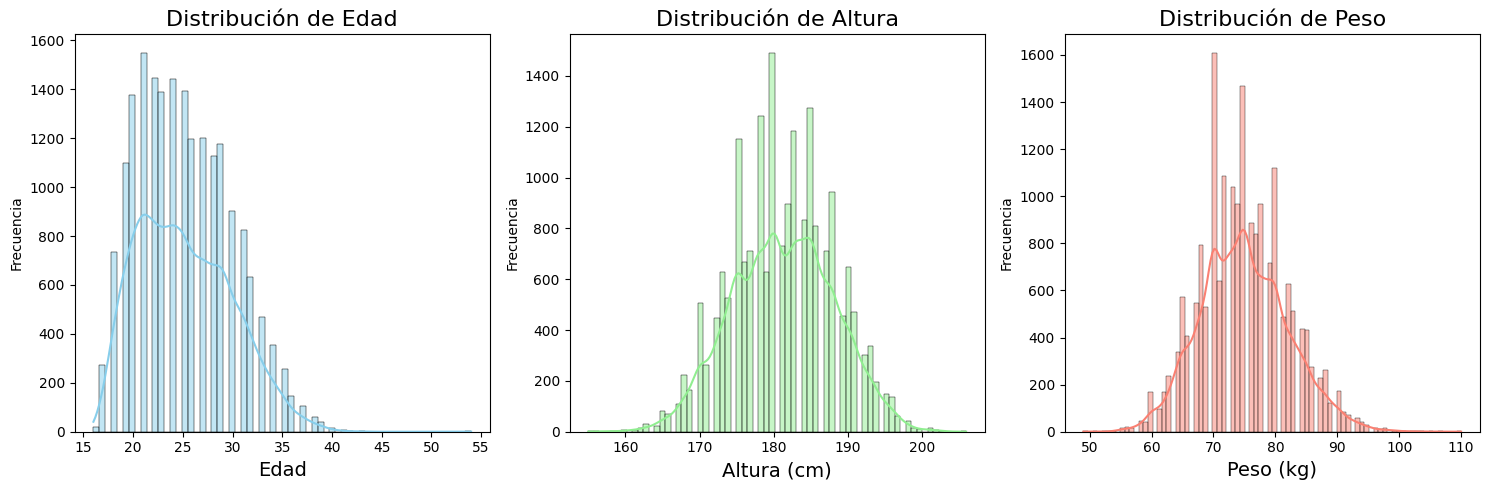

In [ ]:
# histograma sobre la edad, altura y peso de los jugadores


# Crear una figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de Edad
sns.histplot(df_FIFA_nuevo['age'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución de Edad', size=16)
axs[0].set_xlabel('Edad', size=14)
axs[0].set_ylabel('Frecuencia')

# Histograma de Altura
sns.histplot(df_FIFA_nuevo['height_cm'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('Distribución de Altura', size=16)
axs[1].set_xlabel('Altura (cm)', size=14)
axs[1].set_ylabel('Frecuencia')

# Histograma de Peso
sns.histplot(df_FIFA_nuevo['weight_kg'], kde=True, ax=axs[2], color='salmon')
axs[2].set_title('Distribución de Peso', size=16)
axs[2].set_xlabel('Peso (kg)', size=14)
axs[2].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()




1. Distribución de la Edad


La distribución de la edad está sesgada a la derecha, con la mayoría de los jugadores entre los 20 y 30 años.
Hay un pico notable alrededor de los 24-25 años, lo que indica que esta es una edad común para los jugadores en el dataset.
Hay una disminución gradual en la frecuencia a medida que aumenta la edad, lo que refleja la realidad de que la mayoría de los jugadores tienden a estar en su pico de rendimiento entre los 20 y 30 años.

2. Distribución de la Altura


La distribución de la altura es aproximadamente normal, con un pico alrededor de los 180 cm.
La mayoría de los jugadores tienen alturas que oscilan entre los 170 cm y los 190 cm.
Hay una simetría casi perfecta, lo que indica una distribución balanceada de jugadores en términos de altura.

3. Distribución del Peso

La distribución del peso es similar a la de la altura, también siguiendo una distribución normal, con un pico alrededor de los 70-75 kg.
La mayoría de los jugadores tienen un peso entre 60 kg y 85 kg.
Hay una ligera cola hacia la derecha, lo que sugiere que hay algunos jugadores con pesos significativamente más altos que la mayoría.

Impacto en el Rendimiento: Estas variables físicas (edad, altura, peso) suelen influir significativamente en el rendimiento de un jugador. Por ejemplo, la edad puede afectar la velocidad y resistencia, mientras que la altura y el peso pueden ser cruciales para roles específicos en el campo.
Este análisis inicial de las distribuciones proporciona una base sólida para el análisis posterior, donde se podría investigar cómo estas características físicas se relacionan con otras variables clave, como el overall, potential, value_eur, y wage_eur.

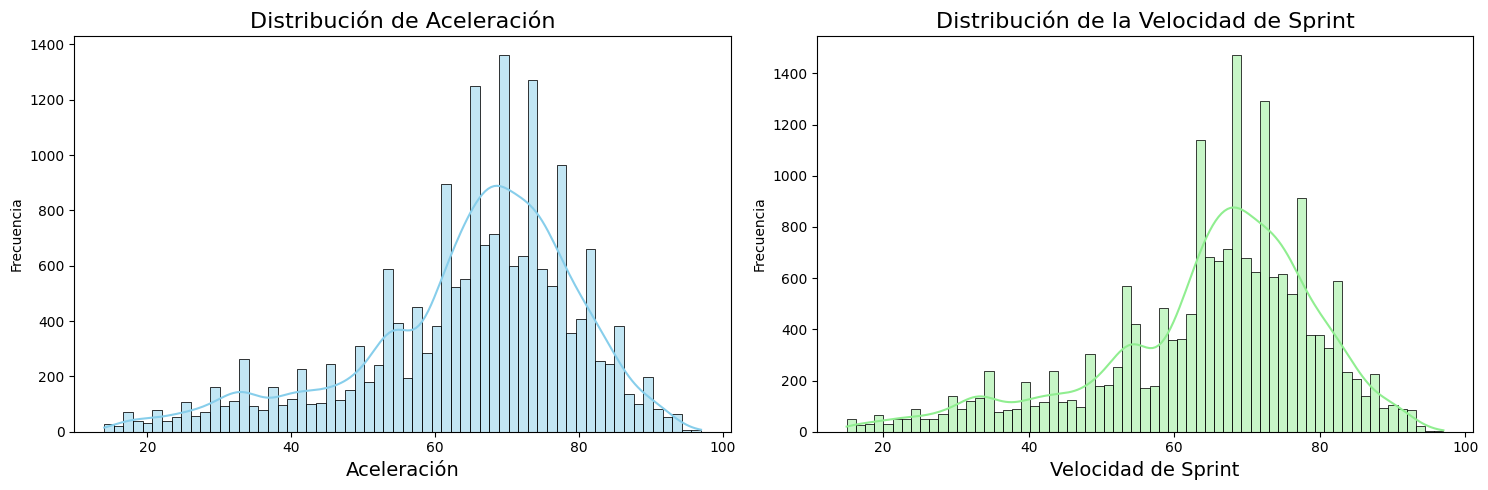

In [ ]:
# histograma sobre aceleración, y sprint-speed de los jugadores


# Crear una figura y ejes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Histograma de Aceleración
sns.histplot(df_FIFA_nuevo['movement_acceleration'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución de Aceleración', size=16)
axs[0].set_xlabel('Aceleración', size=14)
axs[0].set_ylabel('Frecuencia')

# Histograma de Velocidad de Sprint
sns.histplot(df_FIFA_nuevo['movement_sprint_speed'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('Distribución de la Velocidad de Sprint', size=16)
axs[1].set_xlabel('Velocidad de Sprint', size=14)
axs[1].set_ylabel('Frecuencia')



# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



## Aceleración:
 - La distribución de la aceleración muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
 - La presencia de una cola a la derecha sugiere la existencia de algunos jugadores excepcionalmente rápidos en términos de aceleración.
 - Esto indica que la mayoría de los jugadores tienen una aceleración media, pero hay algunos jugadores que destacan por su capacidad para acelerar rápidamente.

## Velocidad de Sprint:
 - La distribución de la velocidad de sprint también muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
 - Similar a la aceleración, la presencia de una cola a la derecha sugiere la existencia de jugadores con velocidades de sprint excepcionales.
 - La mayoría de los jugadores tienen una velocidad de sprint media, pero hay algunos jugadores que destacan por su capacidad para correr a altas velocidades.

## Impacto en el Rendimiento:
 - La aceleración y la velocidad de sprint son atributos cruciales para el rendimiento en el fútbol, especialmente para jugadores que ocupan posiciones ofensivas o que requieren cubrir grandes distancias en el campo.
 - Jugadores con alta aceleración y velocidad de sprint pueden crear oportunidades de gol, superar a los defensores y generar ventaja en el juego.

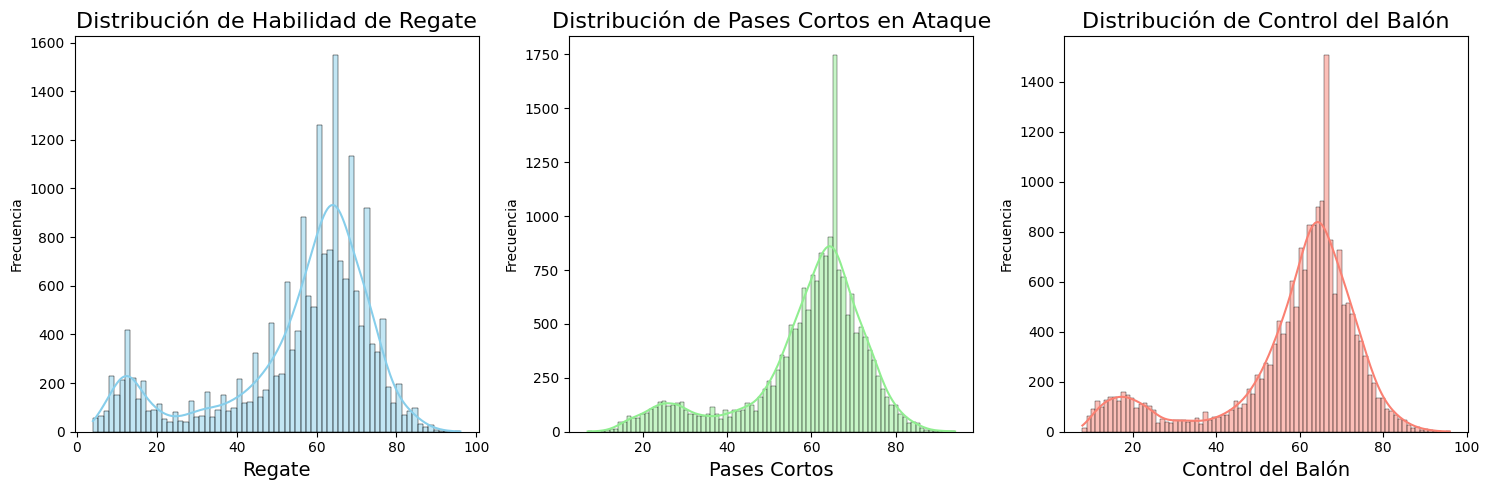

In [ ]:
#Histograma de habilidades técnicas
# Crear una figura y ejes
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma de Skill Dribbling
sns.histplot(df_FIFA_nuevo['skill_dribbling'], kde=True, ax=axs[0], color='skyblue')
axs[0].set_title('Distribución de Habilidad de Regate', size=16)
axs[0].set_xlabel('Regate', size=14)
axs[0].set_ylabel('Frecuencia')

# Histograma de Attacking Short Passing
sns.histplot(df_FIFA_nuevo['attacking_short_passing'], kde=True, ax=axs[1], color='lightgreen')
axs[1].set_title('Distribución de Pases Cortos en Ataque', size=16)
axs[1].set_xlabel('Pases Cortos', size=14)
axs[1].set_ylabel('Frecuencia')

# Histograma de Skill Ball Control
sns.histplot(df_FIFA_nuevo['skill_ball_control'], kde=True, ax=axs[2], color='salmon')
axs[2].set_title('Distribución de Control del Balón', size=16)
axs[2].set_xlabel('Control del Balón', size=14)
axs[2].set_ylabel('Frecuencia')



# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



##  Habilidad de Regate:
- La distribución de la habilidad de regate muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
- La presencia de una cola a la derecha sugiere la existencia de algunos jugadores excepcionalmente hábiles en el regate.
- Esto indica que la mayoría de los jugadores tienen una habilidad de regate media, pero hay algunos jugadores que destacan por su capacidad para controlar el balón y superar a los defensores.

## Pases Cortos en Ataque:
- La distribución de los pases cortos en ataque también muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
- La presencia de una cola a la derecha sugiere la existencia de algunos jugadores excepcionalmente hábiles en los pases cortos.
- Esto indica que la mayoría de los jugadores tienen una habilidad media en los pases cortos, pero hay algunos jugadores que destacan por su precisión y capacidad para conectar pases cortos con sus compañeros.

## Control del Balón:
- La distribución del control del balón muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
- La presencia de una cola a la derecha sugiere la existencia de algunos jugadores excepcionalmente hábiles en el control del balón.
- Esto indica que la mayoría de los jugadores tienen un control del balón medio, pero hay algunos jugadores que destacan por su capacidad para controlar el balón con precisión y habilidad.

## Impacto en el Rendimiento:
- Estas habilidades técnicas son cruciales para el rendimiento en el fútbol, ya que permiten a los jugadores controlar el balón, superar a los defensores y crear oportunidades de gol.
- Jugadores con alta habilidad de regate, pases cortos y control del balón pueden generar ventaja en el juego y dominar el mediocampo.

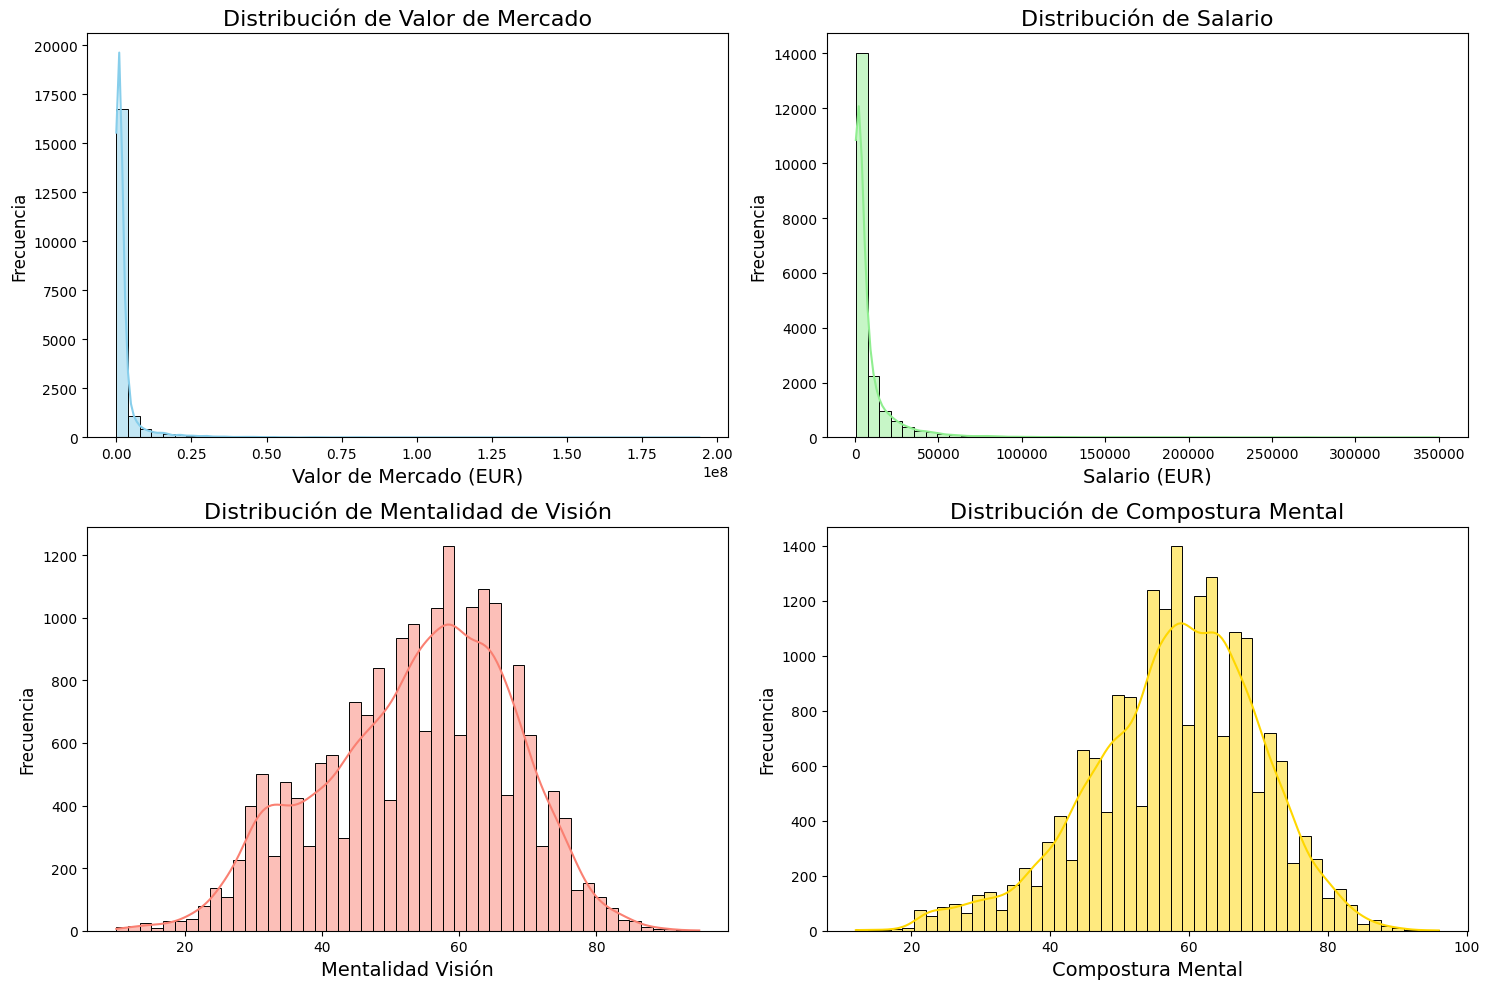

In [ ]:
# Histogramas  de Valor de Mercado, salario, visión y compostura.

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Histograma de Valor de Mercado
sns.histplot(df_FIFA_nuevo['value_eur'], kde=True, ax=axs[0, 0], color='skyblue', bins=50)
axs[0, 0].set_title('Distribución de Valor de Mercado', fontsize=16)
axs[0, 0].set_xlabel('Valor de Mercado (EUR)', fontsize=14)
axs[0, 0].set_ylabel('Frecuencia', fontsize=12)

# Histograma de Salario
sns.histplot(df_FIFA_nuevo['wage_eur'], kde=True, ax=axs[0, 1], color='lightgreen', bins=50)
axs[0, 1].set_title('Distribución de Salario', fontsize=16)
axs[0, 1].set_xlabel('Salario (EUR)', fontsize=14)
axs[0, 1].set_ylabel('Frecuencia', fontsize=12)

# Histograma de mentality_vision
sns.histplot(df_FIFA_nuevo['mentality_vision'], kde=True, ax=axs[1, 0], color='salmon', bins=50)
axs[1, 0].set_title('Distribución de Mentalidad de Visión', fontsize=16)
axs[1, 0].set_xlabel('Mentalidad Visión', fontsize=14)
axs[1, 0].set_ylabel('Frecuencia', fontsize=12)

# Histograma de mentality_composure
sns.histplot(df_FIFA_nuevo['mentality_composure'], kde=True, ax=axs[1, 1], color='gold', bins=50)
axs[1, 1].set_title('Distribución de Compostura Mental', fontsize=16)
axs[1, 1].set_xlabel('Compostura Mental', fontsize=14)
axs[1, 1].set_ylabel('Frecuencia', fontsize=12)



# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()



## Valor de Mercado (value_eur)
- La distribución del valor de mercado muestra una fuerte inclinación hacia la derecha, con la mayoría de los jugadores teniendo un valor relativamente bajo.
- Hay una gran cantidad de jugadores con valores bajos, y una pequeña cantidad de jugadores con valores extremadamente altos.
- Esto refleja la realidad del fútbol donde hay una gran diferencia entre los jugadores comunes y las estrellas.

## Salario (wage_eur)
- La distribución del salario es similar a la del valor de mercado, con una inclinación hacia la derecha.
- La mayoría de los jugadores reciben salarios bajos, mientras que unos pocos jugadores reciben salarios muy altos.
- Esto también refleja la disparidad salarial en el fútbol.

## Mentalidad de Visión (mentality_vision)
- La distribución de la mentalidad de visión muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 50 a 70.
- La presencia de una cola a la derecha sugiere la existencia de algunos jugadores con una visión excepcional.
- Esto indica que la mayoría de los jugadores tienen una visión media, pero hay algunos jugadores que destacan por su capacidad para visualizar el juego y crear oportunidades.

# Compostura Mental (mentality_composure)
- La distribución de la compostura mental muestra una tendencia hacia la derecha, con una mayor concentración de jugadores en el rango de 60 a 80.
- La presencia de una cola a la derecha sugiere la existencia de algunos jugadores con una compostura excepcional.
- Esto indica que la mayoría de los jugadores tienen una compostura media, pero hay algunos jugadores que destacan por su capacidad para mantener la calma bajo presión.

# Impacto en el Rendimiento:
- El valor de mercado y el salario son indicadores importantes del valor de un jugador en el mercado.
- La mentalidad de visión y la compostura mental son atributos cruciales para el rendimiento en el fútbol.
- Jugadores con buena visión pueden crear oportunidades de gol y asistir a sus compañeros.
- Jugadores con alta compostura pueden mantener la calma bajo presión y tomar decisiones cruciales en momentos importantes del juego.

## Analisis Bivariado - Correlacion con otras variables


Las variables seleccionadas fueron elegidas por varias razones:
 - edad: la edad del jugador puede influir en los atributos físicos y la experiencia, lo que afecta el rendimiento general.
 - altura_cm y peso_kg: los atributos físicos pueden afectar la habilidad de un jugador en ciertas posiciones y estilos de juego.
 - habilidad_regate, ataque_paso_corto, control del balón, velocidad de sprint, aceleración: estas habilidades son fundamentales para las contribuciones ofensivas de un jugador e impactan el rendimiento general.
 - mentality_composure, mentality_vision: estos atributos mentales contribuyen a la toma de decisiones, la compostura bajo presión y la inteligencia general del juego.
 - valor_eur, salario_eur: estas variables representan el valor de mercado del jugador y el salario, que son factores importantes en el mundo del fútbol y podrían correlacionarse potencialmente con el rendimiento general.

Nota: Esta es una selección simplificada. Un análisis más completo podría incluir más variables.

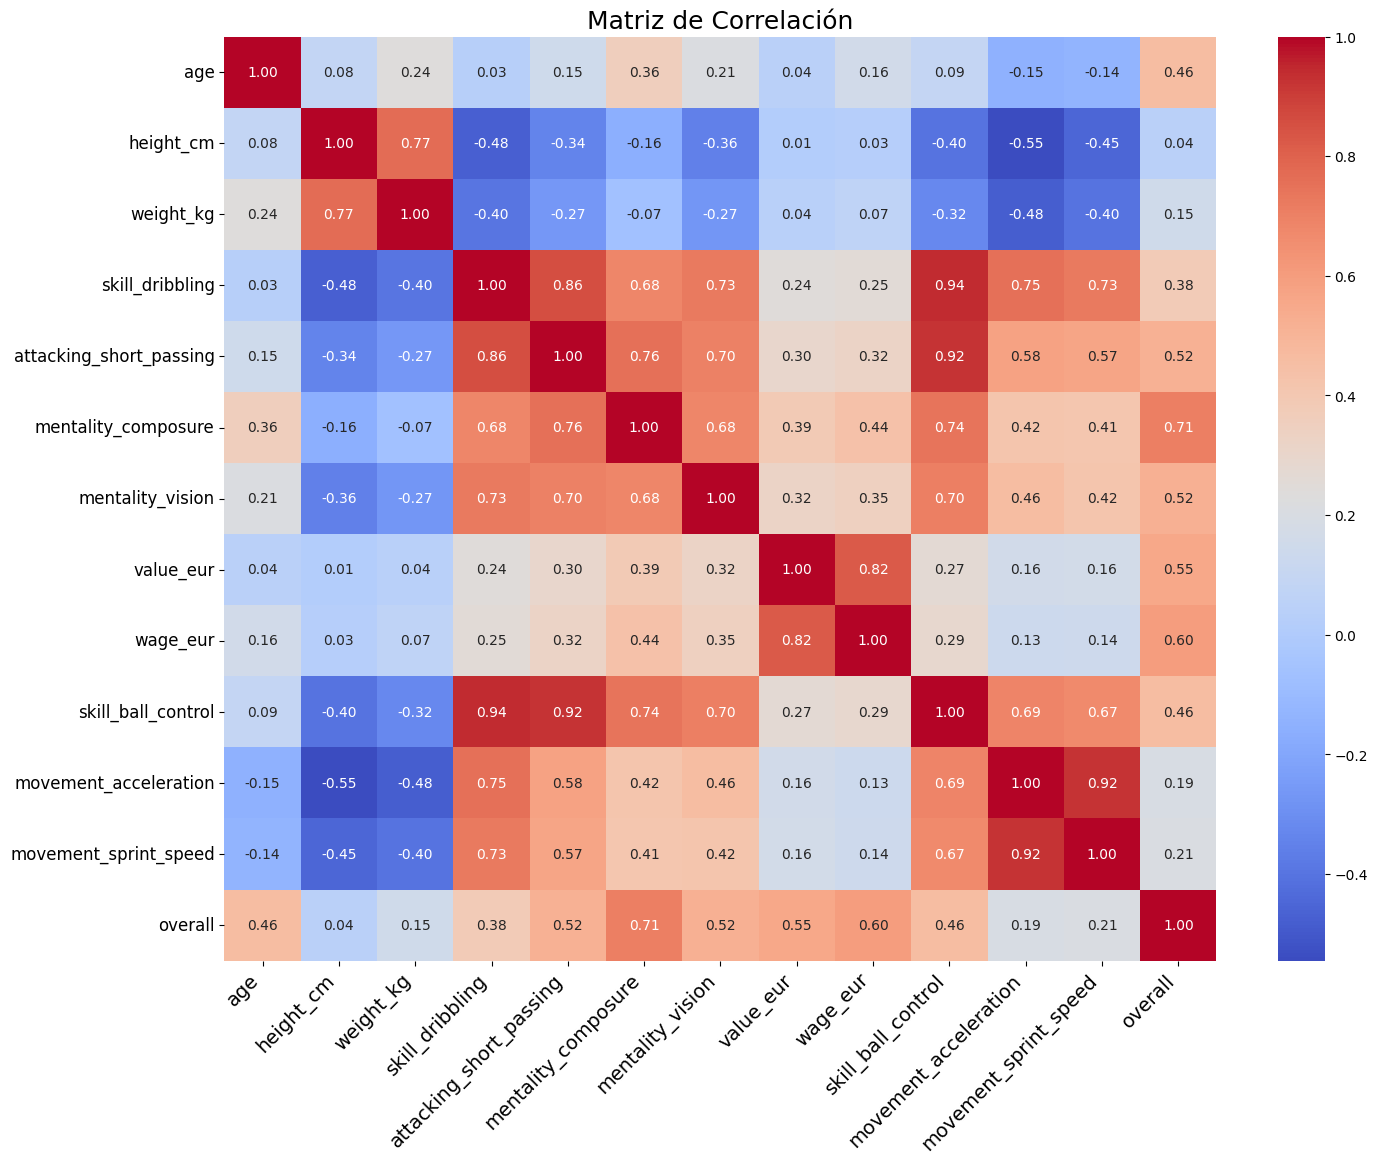

In [ ]:

variables = ['age', 'height_cm', 'weight_kg', 'skill_dribbling', 'attacking_short_passing', 'mentality_composure', 'mentality_vision', 'value_eur', 'wage_eur', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed']

plt.figure(figsize=(16, 12))

correlation_matrix = df_FIFA_nuevo[variables + ['overall']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})  # Ajustar el tamaño de la anotación
plt.title('Matriz de Correlación', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotar y ajustar el tamaño de las etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar el tamaño de las etiquetas del eje y
plt.show()


 ## Correlación con la variable objetivo 'overall'
 - Edad (age): Tiene una correlación moderada positiva (0.46) con 'overall'. Esto sugiere que a mayor edad, los jugadores tienden a tener mejores calificaciones generales, lo cual podría reflejar experiencia o habilidades desarrolladas a lo largo del tiempo.
 - Altura (height_cm) y peso (weight_kg): Ambas características muestran correlaciones muy débiles (0.04 y 0.15, respectivamente) con 'overall', lo que indica que las características físicas de tamaño no tienen un impacto directo considerable en la calificación general de los jugadores.
 - Habilidades técnicas (skill_dribbling, attacking_short_passing, mentality_composure, mentality_vision):
 - Skill_dribbling (0.38) y attacking_short_passing (0.52) tienen una correlación positiva considerable, lo que sugiere que los jugadores con habilidades técnicas destacadas en regate y pase corto tienden a tener una mejor calificación general.
 - Mentality_composure (0.71) y mentality_vision (0.52) también muestran correlaciones positivas fuertes, lo que indica que la compostura y visión de juego son cruciales para el rendimiento general de los jugadores.

## Correlación entre características relevantes
- Skill_dribbling y attacking_short_passing: Tienen una correlación alta (0.86), lo cual es razonable, ya que los jugadores con buen regate también tienden a tener un buen control del balón y precisión en pases cortos.
- Attacking_short_passing y mentality_composure: La correlación es alta (0.76), lo que indica que los jugadores con una alta capacidad de pase también suelen tener una compostura elevada.
- Mentality_composure y mentality_vision: Su alta correlación (0.68) muestra que la compostura y la visión de juego son habilidades relacionadas, lo que puede ser clave para jugadores creativos y en posiciones de mediocampo.

## Relación con el valor y salario
- Value_eur: Muestra una correlación moderada con overall (0.55), lo cual es de esperar ya que los jugadores con mejor rendimiento general suelen tener un mayor valor de mercado.
- Wage_eur: Tiene una correlación fuerte con value_eur (0.82), lo que indica que los jugadores mejor valorados también tienden a tener salarios más altos. Además, la correlación con overall es significativa (0.60), lo que confirma que el rendimiento general es un buen predictor del salario de los jugadores.

## Conclusiones generales
Las habilidades técnicas y mentales, como el regate, el pase corto, la compostura y la visión de juego, son las que más contribuyen a la calificación general de los jugadores.
Las características físicas como la altura y el peso tienen una relación muy débil con la calificación general, lo que sugiere que el rendimiento de un jugador no depende principalmente de su tamaño físico, sino de su habilidad técnica y mental.
Los jugadores con mejor rendimiento en general tienden a ser más valorados y a ganar salarios más altos, aunque la relación entre el rendimiento y el salario es ligeramente más fuerte que la relación entre el rendimiento y el valor de mercado.

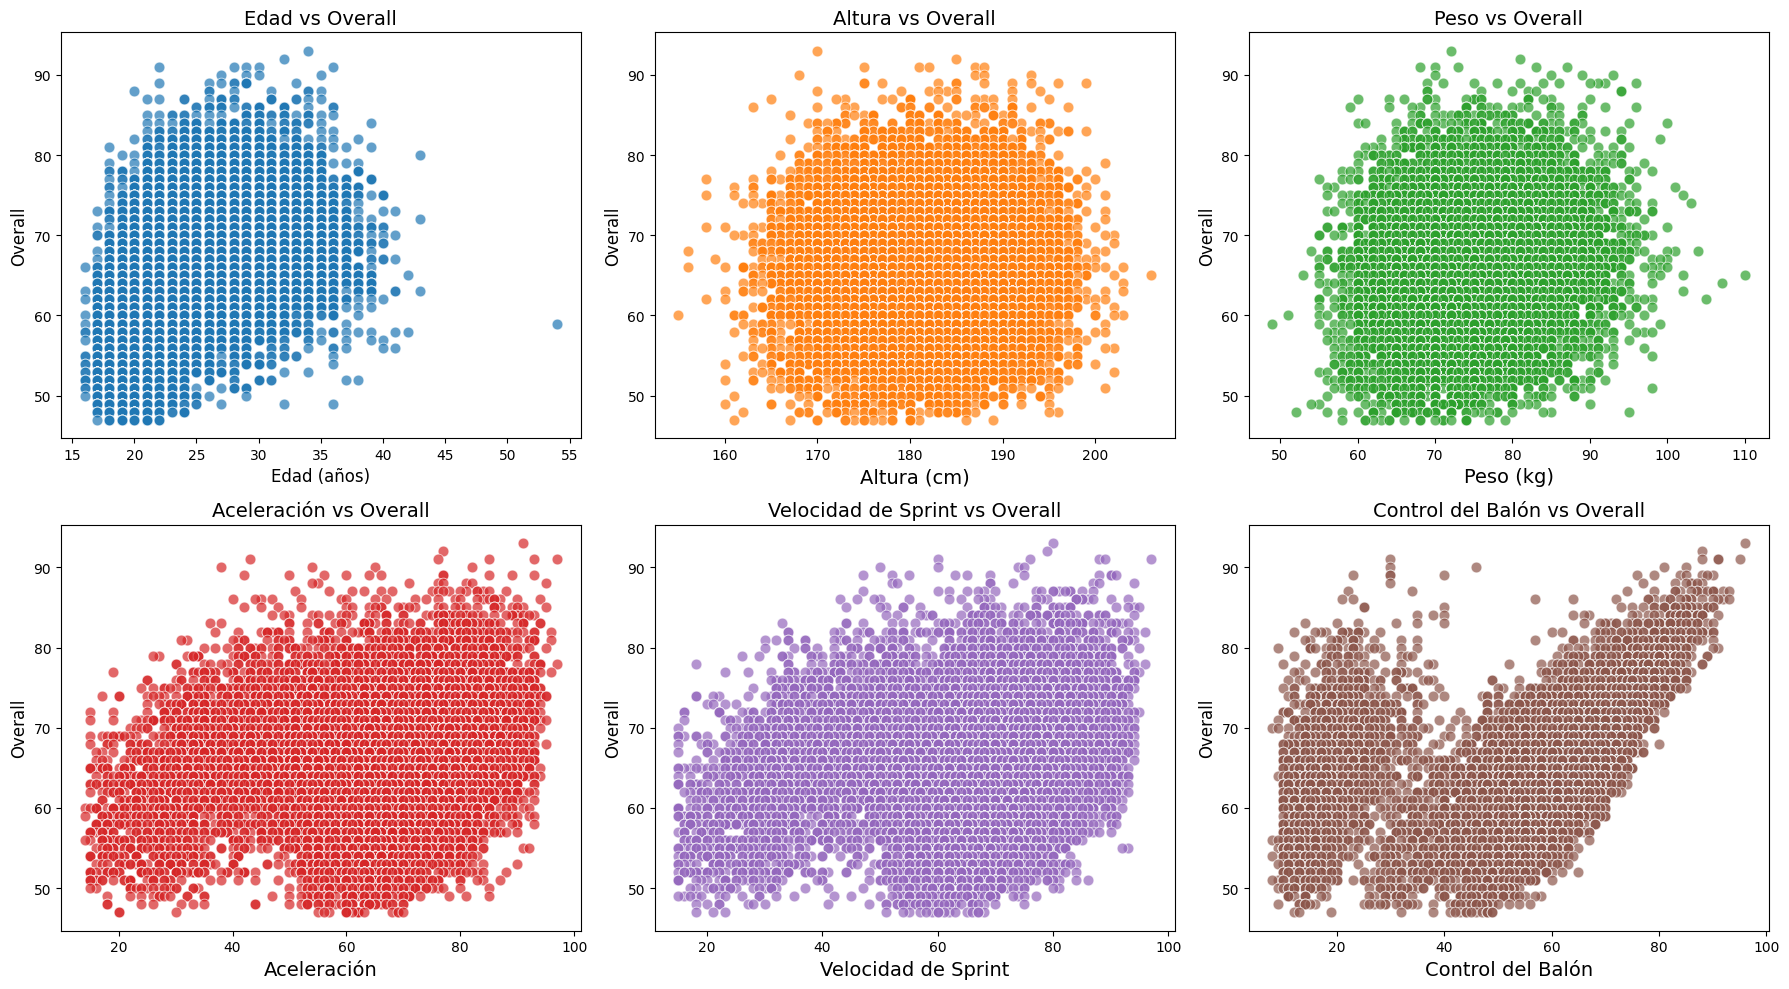

In [ ]:
# grafica de dispersión de las variables variables

# Defino las variables
variables = ['age', 'height_cm', 'weight_kg', 'movement_acceleration', 'movement_sprint_speed','skill_ball_control']


# Crear una figura y ejes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Estilos de color personalizados
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Gráfico de dispersión: Edad vs Overall
sns.scatterplot(x='age', y='overall', data=df_FIFA_nuevo, ax=axs[0, 0], color=colors[0], alpha=0.7, s=60)
axs[0, 0].set_title('Edad vs Overall', fontsize=14)
axs[0, 0].set_xlabel('Edad (años)', fontsize=12)
axs[0, 0].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Altura vs Overall
sns.scatterplot(x='height_cm', y='overall', data=df_FIFA_nuevo, ax=axs[0, 1], color=colors[1], alpha=0.7, s=60)
axs[0, 1].set_title('Altura vs Overall', fontsize=14)
axs[0, 1].set_xlabel('Altura (cm)', fontsize=12)
axs[0, 1].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Peso vs Overall
sns.scatterplot(x='weight_kg', y='overall', data=df_FIFA_nuevo, ax=axs[0, 2], color=colors[2], alpha=0.7, s=60)
axs[0, 2].set_title('Peso vs Overall', fontsize=14)
axs[0, 2].set_xlabel('Peso (kg)', fontsize=12)
axs[0, 2].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Aceleración vs Overall
sns.scatterplot(x='movement_acceleration', y='overall', data=df_FIFA_nuevo, ax=axs[1, 0], color=colors[3], alpha=0.7, s=60)
axs[1, 0].set_title('Aceleración vs Overall', fontsize=14)
axs[1, 0].set_xlabel('Aceleración', fontsize=12)
axs[1, 0].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Velocidad de Sprint vs Overall
sns.scatterplot(x='movement_sprint_speed', y='overall', data=df_FIFA_nuevo, ax=axs[1, 1], color=colors[4], alpha=0.7, s=60)
axs[1, 1].set_title('Velocidad de Sprint vs Overall', fontsize=14)
axs[1, 1].set_xlabel('Velocidad de Sprint', fontsize=12)
axs[1, 1].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Control del Balón vs Overall
sns.scatterplot(x='skill_ball_control', y='overall', data=df_FIFA_nuevo, ax=axs[1, 2], color=colors[5], alpha=0.7, s=60)
axs[1, 2].set_title('Control del Balón vs Overall', fontsize=14)
axs[1, 2].set_xlabel('Control del Balón', fontsize=12)
axs[1, 2].set_ylabel('Overall', fontsize=12)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Edad vs Overall
Se observa una tendencia donde los jugadores más jóvenes tienden a tener un overall más bajo. Sin embargo, a medida que se acercan a los 25-30 años, la mayoría de los jugadores alcanzan su mejor rendimiento.
Después de los 30 años, los jugadores tienden a mantener sus calificaciones generales o disminuir ligeramente, aunque hay algunos jugadores mayores con un overall relativamente alto.
Los jugadores menores de 20 años muestran una gran variabilidad en su overall, reflejando las diferencias en el desarrollo temprano.
## Altura vs Overall
La altura de los jugadores no parece tener una relación clara con el overall. La mayoría de los jugadores se sitúan entre los 170 cm y los 190 cm, y la calificación general es bastante dispersa en todo el rango.
No se observa una tendencia significativa que indique que ser más alto o más bajo afecte directamente la calificación general.
## Peso vs Overall
Al igual que con la altura, el peso de los jugadores no muestra una tendencia clara con respecto al overall. Los jugadores se distribuyen mayoritariamente en un rango de peso de 60 a 90 kg.
No se observa que un mayor peso esté relacionado con un mejor rendimiento general, aunque algunos jugadores más pesados también tienen calificaciones generales altas.
## Aceleración vs Overall
Existe una relación positiva moderada entre la aceleración y el overall. Los jugadores con mejores capacidades de aceleración tienden a tener un overall más alto, pero hay mucha dispersión en la parte baja de la aceleración, lo que sugiere que algunos jugadores con un overall bajo aún tienen buena aceleración.
Los jugadores con un overall superior a 80 tienden a tener valores de aceleración significativamente altos, lo que resalta la importancia de esta habilidad en su rendimiento general.
## Velocidad de Sprint vs Overall
De manera similar a la aceleración, la velocidad de sprint muestra una relación positiva con el overall. A medida que aumenta la velocidad de sprint, el overall tiende a ser mayor.
Los jugadores con mayor velocidad de sprint tienden a tener un overall más alto, aunque hay jugadores con alta velocidad pero con calificaciones generales más bajas, lo que sugiere que la velocidad no es el único factor que afecta el rendimiento.
## Control del Balón vs Overall
Hay una relación positiva bastante clara entre el control del balón y el overall. Los jugadores con un mejor control del balón tienden a tener un overall más alto.
Existe una mayor dispersión en los niveles bajos de control del balón, pero a medida que aumenta esta habilidad, los jugadores muestran un rendimiento general más consistente.

## Conclusiones Generales
Las habilidades físicas como la aceleración y la velocidad de sprint tienen una relación moderadamente positiva con el overall, aunque no son los únicos determinantes del rendimiento general de los jugadores.
El control del balón es una habilidad técnica clave que muestra una relación mucho más fuerte con el overall, lo que indica que los jugadores con mejores habilidades de control tienden a ser más valiosos y tener un mejor rendimiento general.
Las características físicas como la altura y el peso no parecen tener una influencia significativa en la calificación general, lo que refuerza la importancia de las habilidades técnicas y de aceleración en el fútbol.


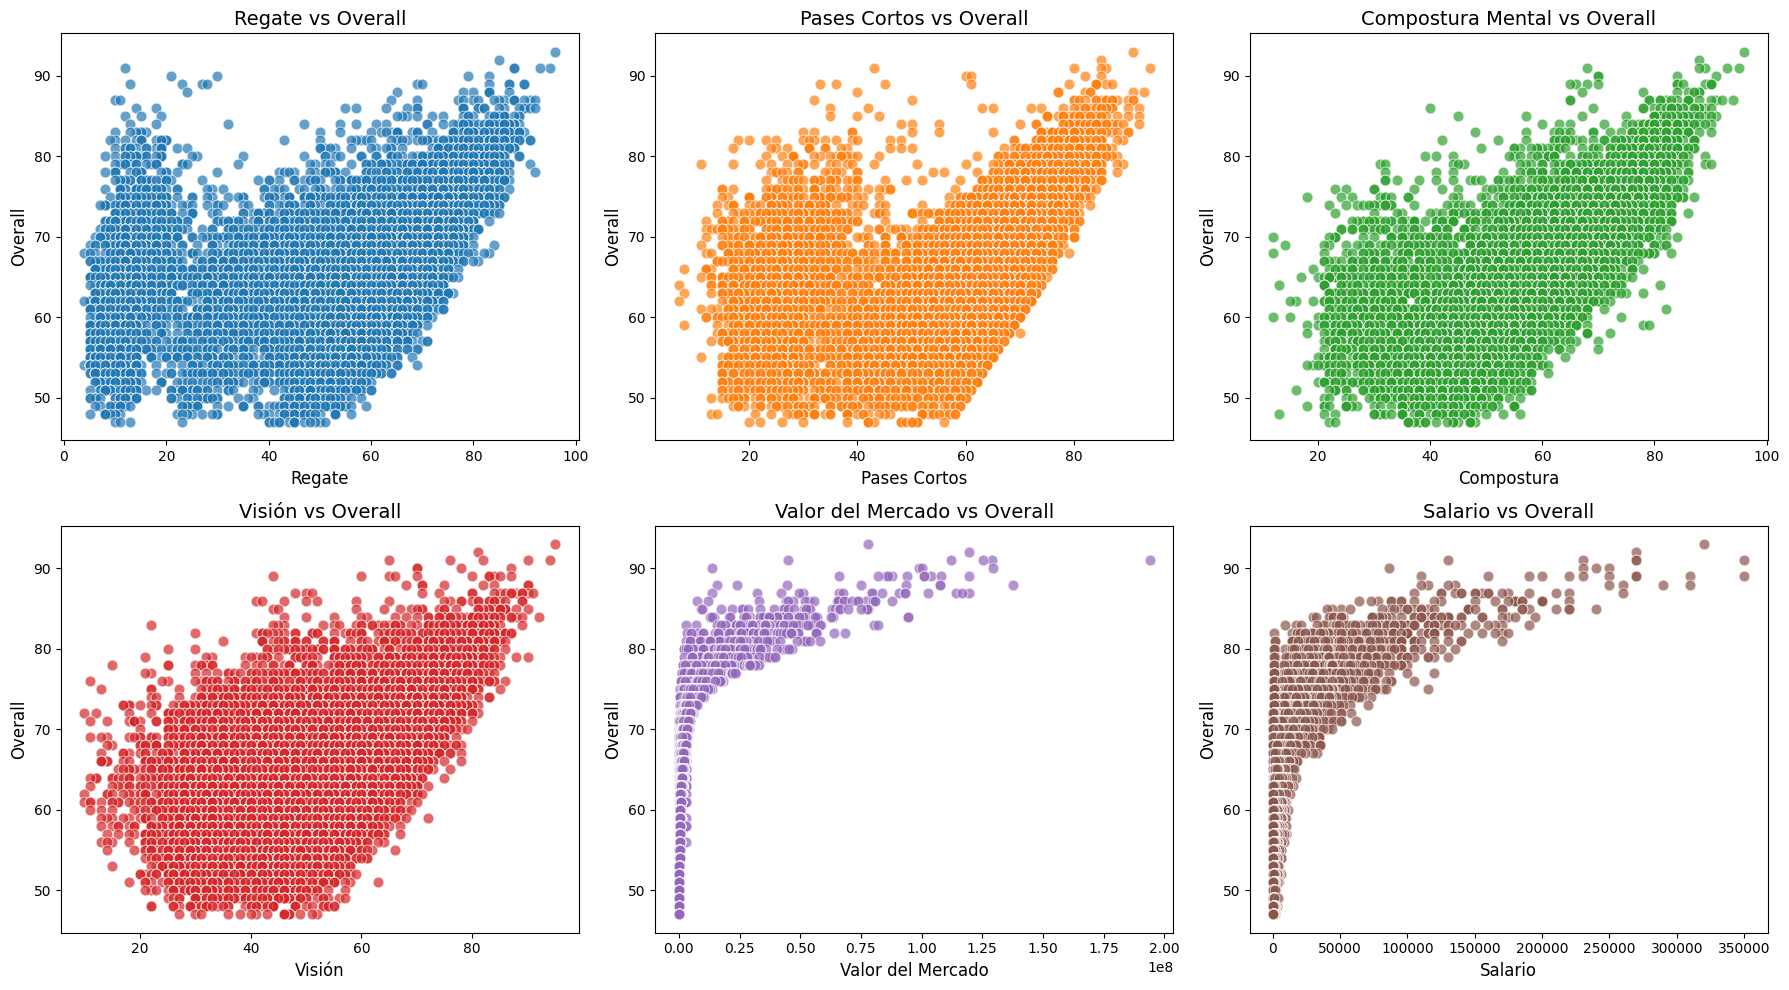

In [ ]:
# gráfico de dispersion entre:


# Definir las variables para los gráficos
variables = ['skill_dribbling', 'attacking_short_passing', 'mentality_composure', 'mentality_vision', 'value_eur', 'wage_eur']


fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Estilos de color personalizados
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Gráfico de dispersión: Regate vs Overall
sns.scatterplot(x='skill_dribbling', y='overall', data=df_FIFA_nuevo, ax=axs[0, 0], color=colors[0], alpha=0.7, s=60)
axs[0, 0].set_title('Regate vs Overall', fontsize=14)
axs[0, 0].set_xlabel('Regate', fontsize=12)
axs[0, 0].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Pases Cortos vs Overall
sns.scatterplot(x='attacking_short_passing', y='overall', data=df_FIFA_nuevo, ax=axs[0, 1], color=colors[1], alpha=0.7, s=60)
axs[0, 1].set_title('Pases Cortos vs Overall', fontsize=14)
axs[0, 1].set_xlabel('Pases Cortos', fontsize=12)
axs[0, 1].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Compostura vs Overall
sns.scatterplot(x='mentality_composure', y='overall', data=df_FIFA_nuevo, ax=axs[0, 2], color=colors[2], alpha=0.7, s=60)
axs[0, 2].set_title('Compostura Mental vs Overall', fontsize=14)
axs[0, 2].set_xlabel('Compostura', fontsize=12)
axs[0, 2].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Visión vs Overall
sns.scatterplot(x='mentality_vision', y='overall', data=df_FIFA_nuevo, ax=axs[1, 0], color=colors[3], alpha=0.7, s=60)
axs[1, 0].set_title('Visión vs Overall', fontsize=14)
axs[1, 0].set_xlabel('Visión', fontsize=12)
axs[1, 0].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Valor del Mercado vs Overall
sns.scatterplot(x='value_eur', y='overall', data=df_FIFA_nuevo, ax=axs[1, 1], color=colors[4], alpha=0.7, s=60)
axs[1, 1].set_title('Valor del Mercado vs Overall', fontsize=14)
axs[1, 1].set_xlabel('Valor del Mercado', fontsize=12)
axs[1, 1].set_ylabel('Overall', fontsize=12)

# Gráfico de dispersión: Salario vs Overall
sns.scatterplot(x='wage_eur', y='overall', data=df_FIFA_nuevo, ax=axs[1, 2], color=colors[5], alpha=0.7, s=60)
axs[1, 2].set_title('Salario vs Overall', fontsize=14)
axs[1, 2].set_xlabel('Salario', fontsize=12)
axs[1, 2].set_ylabel('Overall', fontsize=12)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()


## Regate vs Overall
Existe una fuerte correlación positiva entre el regate y el overall. Los jugadores con mejores habilidades de regate tienden a tener un overall más alto.
En la parte baja de la escala de regate (20-40), hay mucha dispersión en el overall, pero a medida que aumenta el regate, los jugadores con un overall más alto son más consistentes.
## Pases Cortos vs Overall
Los pases cortos también muestran una relación positiva clara con el overall. A medida que los jugadores mejoran en esta habilidad, tienden a tener un overall más alto.
Los jugadores con habilidades de pase cortas por encima de 60-70 suelen tener un overall mayor de 70, lo que indica la importancia de esta habilidad en el rendimiento general de un jugador.
## Compostura Mental vs Overall
La compostura tiene una relación positiva moderada con el overall. Los jugadores con mayor compostura mental tienden a tener un overall más alto.
Aunque la dispersión es amplia en niveles bajos de compostura, los jugadores con un overall superior a 80 tienden a tener una compostura mental más alta, lo que refleja la importancia de mantener la calma y el control en el juego.
## Visión vs Overall
Existe una relación positiva entre la visión y el overall, similar a los gráficos de habilidades anteriores. A medida que aumenta la visión, los jugadores tienden a tener una calificación general más alta.
Los jugadores con una visión por encima de 60 tienden a tener un overall alto, lo que refuerza la importancia de esta habilidad para jugadores que necesitan anticipar y crear jugadas.
## Valor del Mercado vs Overall
El valor del mercado muestra una relación exponencial con el overall. Los jugadores con un overall mayor de 70 tienden a tener un valor de mercado que crece rápidamente, y este crecimiento es aún más pronunciado para jugadores con un overall superior a 80.
Los jugadores de élite, con un overall cercano a 90, tienen un valor de mercado extremadamente alto, lo que refleja su impacto en el campo y su valor para los clubes.
## Salario vs Overall
El salario también tiene una relación positiva y similar al valor de mercado con el overall. Los jugadores con calificaciones generales más altas tienden a recibir salarios más elevados.
Se observa que los jugadores con un overall superior a 80 tienden a ganar significativamente más, lo que indica que los clubes valoran y recompensan el rendimiento y las habilidades de estos jugadores con contratos más lucrativos.

## Comentarios
Las habilidades técnicas como el regate, los pases cortos, la compostura y la visión están fuertemente relacionadas con el overall. Los jugadores que destacan en estas áreas suelen tener un mejor rendimiento general.
Los factores económicos como el valor del mercado y el salario también están altamente correlacionados con el overall, reflejando que los jugadores con un mejor rendimiento general suelen tener un mayor valor para los clubes y, por lo tanto, son más remunerados.
La relación entre las habilidades técnicas y los factores económicos refuerza la importancia de desarrollar estas capacidades para aumentar el valor de los jugadores tanto en el campo como en el mercado.


## Análisis Multivariado

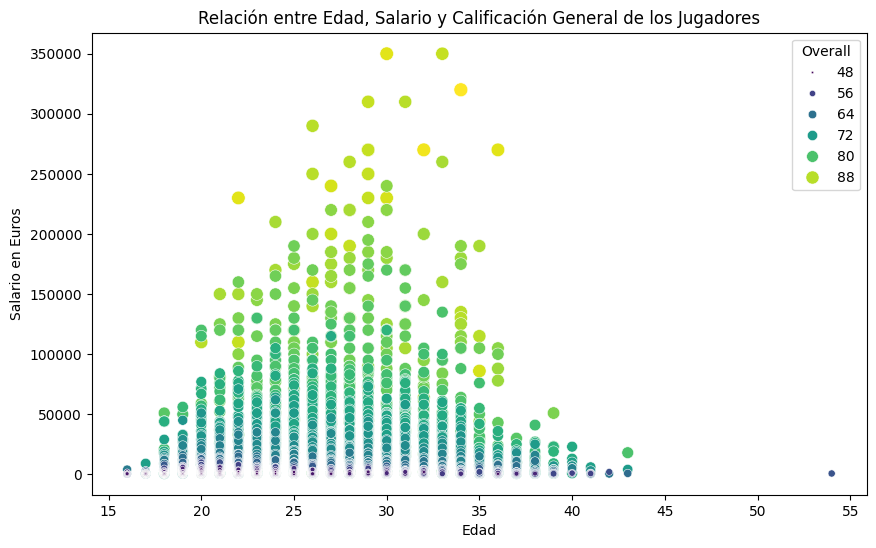

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='wage_eur', hue='overall', size='overall', sizes=(1, 100), data=df_FIFA, palette='viridis')

plt.title('Relación entre Edad, Salario y Calificación General de los Jugadores')

plt.xlabel('Edad')

plt.ylabel('Salario en Euros')

plt.legend(title='Overall')

plt.show()


De la grafica de más arriba se puede observar:

1- La mayoría de los jugadores con mayor valor en euros se encuentran entre los 20 y 30 años.

2- Hay una tendencia general a que el valor en euros disminuya con la edad, especialmente después de los 30 años.

3- Esto se debe a que los jugadores más jóvenes tienen más potencial para crecer y desarrollarse.

4- Existen algunos jugadores mayores con un valor en euros alto, lo que sugiere que la experiencia y el talento pueden compensar la edad.

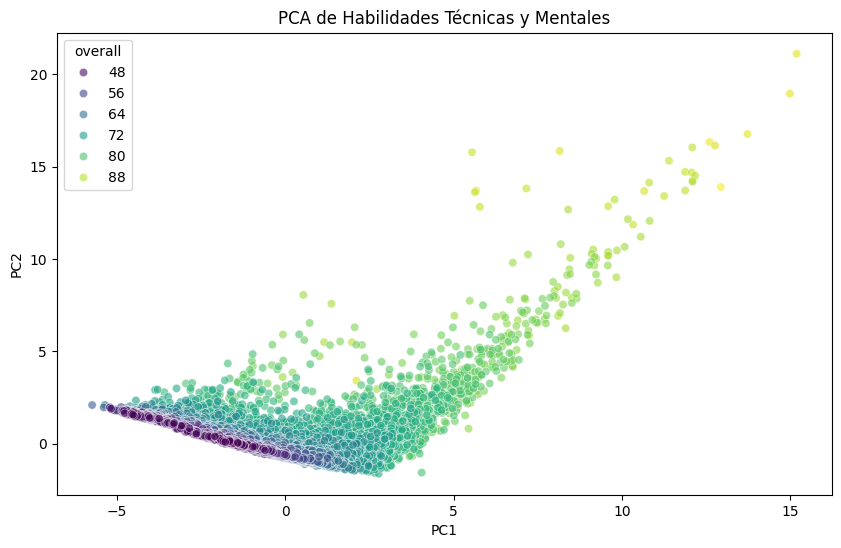

In [ ]:


features = ['skill_dribbling', 'attacking_short_passing', 'mentality_composure',
            'mentality_vision', 'value_eur', 'wage_eur']

# Estandarizar los datos
x = StandardScaler().fit_transform(df_FIFA_nuevo[features])

# Aplicar PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
principal_components = pca.fit_transform(x)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['overall'] = df_FIFA_nuevo['overall']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='overall', data=df_pca, palette='viridis', alpha=0.6)
plt.title('PCA de Habilidades Técnicas y Mentales')
plt.show()


El eje PC1 muestra la combinación lineal de las variables que explica la mayor cantidad de varianza en los datos. Los valores de PC1 parecen estar más dispersos a medida que aumentan, especialmente en los jugadores con un overall más alto.
El eje PC2 captura la segunda mayor cantidad de varianza y muestra menos dispersión en comparación con PC1, pero sigue aportando información adicional, especialmente para los jugadores con overall medio y alto.

## Relación entre overall y las componentes principales:

El gráfico muestra que los jugadores con mayor overall (72, 80, 88) tienden a estar ubicados hacia valores más altos de PC1 y PC2. Esto sugiere que las habilidades técnicas y mentales que componen estas dos componentes están fuertemente correlacionadas con un mejor desempeño general (overall).
Los jugadores con bajo overall (48, 56, 64) están más agrupados hacia valores bajos de PC1 y PC2, lo que indica que tienen valores más bajos en las combinaciones lineales de habilidades que estas componentes representan.

## Clusters naturales:

Se observan agrupamientos naturales de jugadores en la parte baja izquierda del gráfico, que corresponde a aquellos con menor overall, y otro agrupamiento más disperso en la parte superior derecha, que corresponde a jugadores con mayor overall.
Esta separación sugiere que las habilidades que definen las dos primeras componentes principales son útiles para distinguir entre jugadores de bajo y alto rendimiento.

## Comentarios
El PCA ha logrado reducir la dimensionalidad del dataset a dos variables que explican bastante bien la diferencia en el overall de los jugadores. Los resultados muestran una tendencia clara: los jugadores con mayor overall tienden a ubicarse en las zonas superiores de PC1 y PC2, lo que sugiere que estas componentes capturan bien las diferencias en las habilidades técnicas y mentales. El gráfico es útil para visualizar cómo el overall de los jugadores está relacionado con combinaciones de sus atributos clave.

## Insights
**Relación clara entre las habilidades técnicas y el rendimiento global:**

Variables como dribbling, pases cortos, compostura y visión de juego mostraron una relación positiva y significativa con el overall. Jugadores con mayor habilidad en estas áreas tienden a tener un mejor rendimiento general.
Esto sugiere que para mejorar el rendimiento de los jugadores, los entrenadores y analistas deben enfocarse en desarrollar estas habilidades técnicas clave.

**Importancia del valor de mercado y salario en el rendimiento:**

Existe una correlación evidente entre el valor de mercado y el salario de los jugadores con su overall. Los jugadores con mayor overall tienden a tener un valor de mercado más alto y, en consecuencia, un salario mayor.
Sin embargo, hay algunas excepciones que indican jugadores con un rendimiento elevado (overall alto) que aún no tienen un salario o valor de mercado acorde. Esto puede ser útil para identificar talento emergente que aún no ha sido completamente valorizado.

**El análisis de componentes principales (PCA):**

El PCA mostró que dos componentes principales pueden explicar gran parte de la varianza en las habilidades técnicas y mentales de los jugadores. Las primeras dos componentes están altamente relacionadas con el rendimiento (overall).
Los jugadores con mayor overall se agrupan en el cuadrante superior derecho del gráfico de PCA, lo que indica que las combinaciones lineales de habilidades técnicas y mentales determinan claramente su rendimiento.

**Patrones de agrupamiento y outliers:**

El análisis gráfico y multivariado mostró la existencia de varios agrupamientos naturales de jugadores con habilidades similares. Los jugadores con bajo overall tienden a agruparse más estrechamente, mientras que los de mayor overall están más dispersos, indicando mayor variabilidad entre los mejores jugadores.
Además, se identificaron algunos outliers que podrían ser jugadores extraordinarios con habilidades específicas extremadamente altas o jugadores que no están correctamente valorados en el mercado en función de su overall.

**Diferencias en las habilidades físicas:**

Si bien las habilidades técnicas y mentales fueron los principales determinantes del overall, las habilidades físicas (altura, peso, velocidad) también influyeron en menor medida. Sin embargo, estas características no parecieron ser tan determinantes como las habilidades técnicas o mentales en la mayoría de los jugadores, excepto en posiciones muy específicas como defensores y delanteros.

## Recomendaciones
**Foco en el desarrollo de habilidades técnicas clave:**

Los clubes y entrenadores deberían priorizar el desarrollo de habilidades técnicas como el regate, los pases cortos y la visión de juego, ya que estas son las que más influyen en el rendimiento global de los jugadores.
Personalizar programas de entrenamiento para mejorar estas áreas en jugadores jóvenes puede ser una inversión a largo plazo para mejorar su rendimiento general y su valor de mercado.

**Identificación de talento emergente subvalorado:**

Los clubes pueden usar el análisis para identificar jugadores con un alto overall que están subvalorados en el mercado. Estos jugadores representan oportunidades de fichaje a menor costo con un alto potencial de retorno a medida que aumente su valor de mercado.
Analizar estos datos puede ser clave para equipos que buscan maximizar el rendimiento con presupuestos ajustados.

**Optimización de decisiones salariales y de fichajes:**

Los datos muestran que algunos jugadores con altos salarios pueden no estar aportando proporcionalmente a su equipo, lo que sugiere una revisión de las políticas salariales basadas en el rendimiento medido con datos.
Para las negociaciones contractuales, el análisis puede ser útil para justificar ajustes salariales o renovaciones de contrato basados en las habilidades que son más predictivas del éxito en el campo.

**Personalización del scouting:**

Al usar modelos predictivos basados en las habilidades técnicas y mentales, los equipos de scouting pueden identificar más fácilmente a los jugadores que se ajustan a las necesidades tácticas y de rendimiento del equipo.
Aumentar el enfoque en jugadores que sobresalgan en regate, compostura y visión de juego puede mejorar la toma de decisiones en cuanto a qué tipo de jugador contratar o desarrollar para ciertas posiciones.

**Análisis continuo de rendimiento:**

El uso de análisis multivariado y PCA debe incorporarse de manera continua para monitorear el rendimiento de los jugadores a lo largo del tiempo. Esta estrategia permitirá ajustar tanto las tácticas de juego como los entrenamientos para maximizar el rendimiento de los jugadores en función de sus habilidades cambiantes.
Evaluar periódicamente las habilidades técnicas y mentales más importantes a lo largo de la temporada puede ayudar a detectar problemas antes de que afecten negativamente al rendimiento global.
